# 4. Marketing Campaign Analysis with Clusters

In [1]:
import pandas as pd

In [42]:
# For visualizations
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import plotly.express as px

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 5.)})
sns.set_style('whitegrid')
pal = ["#c6ff33","#41b6c4", "#225ea8","#081d58"]

In [3]:
df = pd.read_csv('../Data/data_mktg_with_clusters.csv', encoding = "ISO-8859-1")

In [10]:
df.sample()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
758,0,0,0,0,0,0,2


In [5]:
# First, let's remove the 'Income' column which was added to check the clusters and the data was in the same order as the rest of datasets
df.drop(columns = 'Income', inplace = True)

In [6]:
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,3


In [19]:
df_graph = df.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum', 'AcceptedCmp2': 'sum', 'AcceptedCmp3': 'sum', 'AcceptedCmp4': 'sum', 'AcceptedCmp5': 'sum', 'Response': 'sum'})
df_graph

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,
0,110,14,38,60,135,142
1,1,2,64,11,0,71
2,24,13,41,60,27,63
3,9,1,20,36,0,58


In [24]:
df_graph0 = df_graph.transpose()

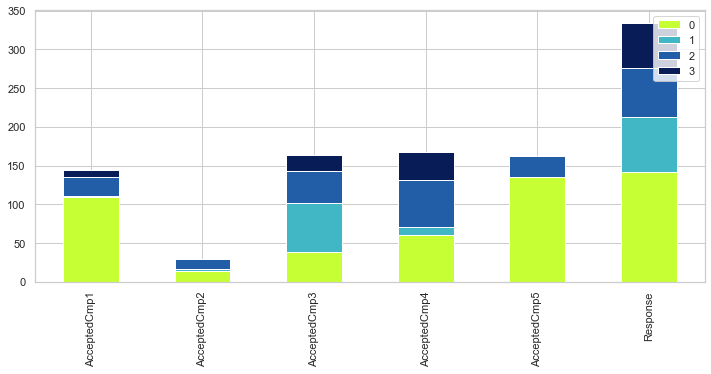

In [43]:
df_graph0.plot(kind='bar', color = ["#c6ff33","#41b6c4", "#225ea8","#081d58"], stacked=True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

In [44]:
df_graph0

Cluster,0,1,2,3
AcceptedCmp1,110,1,24,9
AcceptedCmp2,14,2,13,1
AcceptedCmp3,38,64,41,20
AcceptedCmp4,60,11,60,36
AcceptedCmp5,135,0,27,0
Response,142,71,63,58


In [49]:
df_graph0[[0,1,2,3]] = df_graph0[[0,1,2,3]].apply(lambda x: round(x/x.sum(), 2), axis=1)
df_graph0

Cluster,0,1,2,3
AcceptedCmp1,0.73,0.00,0.18,0.09
AcceptedCmp2,0.50,0.10,0.40,0.00
AcceptedCmp3,0.20,0.40,0.30,0.10
AcceptedCmp4,0.36,0.09,0.36,0.18
AcceptedCmp5,0.80,0.00,0.20,0.00
Response,0.40,0.20,0.20,0.20


Cluster 0 is the most receptive to campaigns, which kind of makes sense considering it is the most loyal cluster

In [ ]:
Acceptance % by cluster and by campaign???